In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm

### Loading Data in a pandas dataframe

In [2]:
df = pd.read_excel("customer_churn_large_dataset.xlsx")
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


### Checking for missing values

In [3]:
df.isna().any()

CustomerID                    False
Name                          False
Age                           False
Gender                        False
Location                      False
Subscription_Length_Months    False
Monthly_Bill                  False
Total_Usage_GB                False
Churn                         False
dtype: bool

### Checking for unique locations

In [4]:
df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

### Mapping all locations and Genders to Intergers

In [5]:
location_map = {'Los Angeles':0,'New York':1,
            'Miami':2,'Chicago':3, 'Houston':4}
gender_map = {'Male':0,'Female':1}

loc_df = df["Location"].map(location_map)
df["Location"] = loc_df
up_df = df["Gender"].map(gender_map)
df["Gender"] = up_df
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,0,0,17,73.36,236,0
1,2,Customer_2,62,1,1,1,48.76,172,0
2,3,Customer_3,24,1,0,5,85.47,460,0
3,4,Customer_4,36,1,2,3,97.94,297,1
4,5,Customer_5,46,1,2,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,0,4,23,55.13,226,1
99996,99997,Customer_99997,62,1,1,19,61.65,351,0
99997,99998,Customer_99998,64,0,3,17,96.11,251,1
99998,99999,Customer_99999,51,1,1,20,49.25,434,1


### Getting relevant Features and Targets

In [6]:
features = ['Age','Gender','Location','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']
target = ['Churn']

### Checking correlation values between features

In [7]:
df[features].corr()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
Age,1.000000,-0.000832,0.006660,0.003382,0.001110,0.001927
Gender,-0.000832,1.000000,-0.004848,-0.000320,-0.002239,0.001385
Location,0.006660,-0.004848,1.000000,0.001574,-0.003367,-0.001251
Subscription_Length_Months,0.003382,-0.000320,0.001574,1.000000,-0.005294,-0.002203
Monthly_Bill,0.001110,-0.002239,-0.003367,-0.005294,1.000000,0.003187
Total_Usage_GB,0.001927,0.001385,-0.001251,-0.002203,0.003187,1.000000


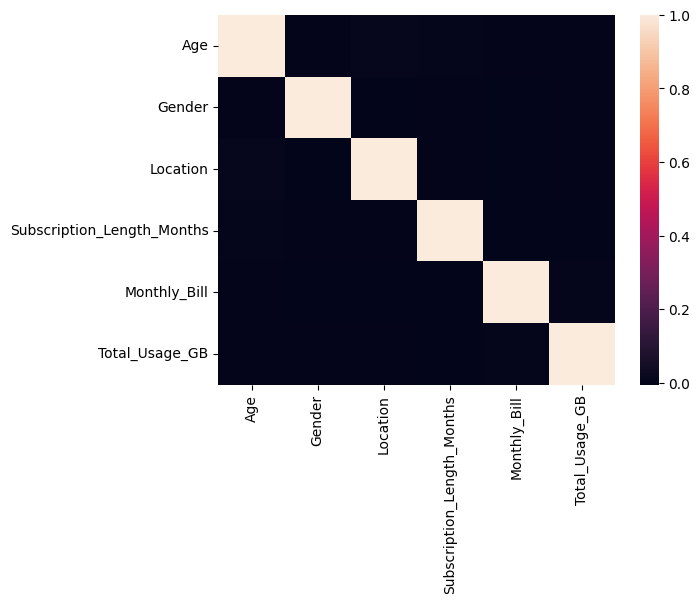

In [8]:
sns.heatmap(df[features].corr())
plt.show()

### Creating numpy arrays of our features and target

In [9]:
input_ar = np.array(df[features])
target_ar = np.array(df[target])
print(f"Input_Shape:{input_ar.shape}, Target_Shape:{target_ar.shape}")

Input_Shape:(100000, 6), Target_Shape:(100000, 1)


#### We have six features and one target
- Features
    - Age,
    - Gender
    - Location
    - Subscription_Length_Months
    - Monthly_Bill
    - Total_Usage_GB
- Target
    - Churn

In [10]:
def std_data(x):
    """
    Standardizing data
    """
    mean = np.mean(x)
    std = np.std(x)
    x = x-mean
    x = x/std
    return x


In [57]:
print(np.mean(input_ar))
print(np.std(input_ar))

1.2050804798491299e-16
1.0


In [11]:
input_ar

array([[ 63.  ,   0.  ,   0.  ,  17.  ,  73.36, 236.  ],
       [ 62.  ,   1.  ,   1.  ,   1.  ,  48.76, 172.  ],
       [ 24.  ,   1.  ,   0.  ,   5.  ,  85.47, 460.  ],
       ...,
       [ 64.  ,   0.  ,   3.  ,  17.  ,  96.11, 251.  ],
       [ 51.  ,   1.  ,   1.  ,  20.  ,  49.25, 434.  ],
       [ 27.  ,   1.  ,   0.  ,  19.  ,  76.57, 173.  ]])

In [12]:
# New standardized data
input_ar = std_data(input_ar)
print(input_ar)

[[-0.03095688 -0.60261102 -0.60261102 -0.44835514  0.06304847  1.53882353]
 [-0.04003076 -0.59353714 -0.59353714 -0.59353714 -0.16016886  0.95809551]
 [-0.38483801 -0.59353714 -0.60261102 -0.55724164  0.17293309  3.57137157]
 ...
 [-0.02188301 -0.60261102 -0.57538939 -0.44835514  0.26947913  1.67493165]
 [-0.13984338 -0.59353714 -0.59353714 -0.42113351 -0.15572267  3.33545082]
 [-0.35761639 -0.59353714 -0.60261102 -0.43020739  0.0921756   0.96716939]]


## Splitting Training and testing Data

In [13]:
# splitting 20% testing data
inputs_train,inputs_test,targets_train,targets_test = train_test_split(input_ar, target_ar, test_size=0.20)

### Checking shapes of splits

In [14]:
print(f"x1:{inputs_train.shape} y1:{inputs_test.shape} x2:{targets_train.shape} y2:{targets_test.shape}")

x1:(80000, 6) y1:(20000, 6) x2:(80000, 1) y2:(20000, 1)


### Converting numpy arrays to Tensors

In [15]:
X_train = torch.from_numpy(inputs_train.astype(np.float32))
X_test = torch.from_numpy(inputs_test.astype(np.float32))
y_train = torch.from_numpy(targets_train.astype(np.float32))
y_test = torch.from_numpy(targets_test.astype(np.float32))

## Custom Neural Network with fine tuning for churn prediction

In [16]:
class ChurnModel(nn.Module):
    """
    Neural Network for churn prediction
    """
    def __init__(self,no_of_features):
        super(ChurnModel, self).__init__()
        self.linear1 = nn.Linear(no_of_features,no_of_features*2)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(no_of_features*2,1)
        self.sigmoid = nn.Sigmoid()
        

    def forward(self, targets_train ):
        out = self.linear1(targets_train)
        out  = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

model = ChurnModel(no_of_features=6)

## Model Architecture

In [17]:
model

ChurnModel(
  (linear1): Linear(in_features=6, out_features=12, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=12, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

## Hyperparameters

In [52]:
EPOCHS = 10*200
LEARNING_RATE = 0.001
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [53]:
losses = []
losses_test = []
Iterations = []
iter = 0
for epoch in tqdm(range(int(EPOCHS)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(outputs, labels) 
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. the weights/bias
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    iter+=1
    if iter%50==0:
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = model(X_test)
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(outputs.round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Sure_pred_acc: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Sure_pred_acc: {accuracy}\n")

Training Epochs:   4%|▍         | 79/2000 [00:00<00:12, 156.13it/s]

Iteration: 50. 
Test - Loss: 0.693576991558075. Sure_pred_acc: 49.85
Train -  Loss: 0.693274736404419. Sure_pred_acc: 50.26125



Training Epochs:   6%|▌         | 111/2000 [00:00<00:13, 139.93it/s]

Iteration: 100. 
Test - Loss: 0.6935765147209167. Sure_pred_acc: 49.855
Train -  Loss: 0.6932745575904846. Sure_pred_acc: 50.2575



Training Epochs:   9%|▊         | 171/2000 [00:01<00:13, 140.65it/s]

Iteration: 150. 
Test - Loss: 0.6935761570930481. Sure_pred_acc: 49.86
Train -  Loss: 0.6932743191719055. Sure_pred_acc: 50.2575



Training Epochs:  11%|█         | 214/2000 [00:01<00:14, 122.36it/s]

Iteration: 200. 
Test - Loss: 0.6935757398605347. Sure_pred_acc: 49.87
Train -  Loss: 0.6932741403579712. Sure_pred_acc: 50.2675



Training Epochs:  13%|█▎        | 267/2000 [00:01<00:13, 125.67it/s]

Iteration: 250. 
Test - Loss: 0.6935753226280212. Sure_pred_acc: 49.86
Train -  Loss: 0.6932739019393921. Sure_pred_acc: 50.27375



Training Epochs:  16%|█▌        | 324/2000 [00:02<00:12, 137.37it/s]

Iteration: 300. 
Test - Loss: 0.6935749053955078. Sure_pred_acc: 49.86
Train -  Loss: 0.6932736039161682. Sure_pred_acc: 50.2675



Training Epochs:  18%|█▊        | 366/2000 [00:02<00:12, 135.11it/s]

Iteration: 350. 
Test - Loss: 0.6935744881629944. Sure_pred_acc: 49.845
Train -  Loss: 0.6932734847068787. Sure_pred_acc: 50.26125



Training Epochs:  21%|██        | 422/2000 [00:03<00:12, 124.77it/s]

Iteration: 400. 
Test - Loss: 0.6935740113258362. Sure_pred_acc: 49.84
Train -  Loss: 0.6932733654975891. Sure_pred_acc: 50.26375



Training Epochs:  23%|██▎       | 466/2000 [00:03<00:11, 136.09it/s]

Iteration: 450. 
Test - Loss: 0.6935736536979675. Sure_pred_acc: 49.86
Train -  Loss: 0.69327312707901. Sure_pred_acc: 50.2625



Training Epochs:  26%|██▋       | 526/2000 [00:03<00:10, 143.98it/s]

Iteration: 500. 
Test - Loss: 0.6935732364654541. Sure_pred_acc: 49.88
Train -  Loss: 0.6932728290557861. Sure_pred_acc: 50.265



Training Epochs:  29%|██▊       | 571/2000 [00:04<00:10, 140.61it/s]

Iteration: 550. 
Test - Loss: 0.6935728788375854. Sure_pred_acc: 49.88
Train -  Loss: 0.6932727098464966. Sure_pred_acc: 50.27375



Training Epochs:  31%|███       | 614/2000 [00:04<00:10, 132.67it/s]

Iteration: 600. 
Test - Loss: 0.6935723423957825. Sure_pred_acc: 49.895
Train -  Loss: 0.6932724714279175. Sure_pred_acc: 50.27875



Training Epochs:  33%|███▎      | 668/2000 [00:05<00:10, 124.23it/s]

Iteration: 650. 
Test - Loss: 0.6935720443725586. Sure_pred_acc: 49.895
Train -  Loss: 0.6932722926139832. Sure_pred_acc: 50.28125



Training Epochs:  36%|███▌      | 720/2000 [00:05<00:10, 123.40it/s]

Iteration: 700. 
Test - Loss: 0.6935716867446899. Sure_pred_acc: 49.905
Train -  Loss: 0.6932721138000488. Sure_pred_acc: 50.28



Training Epochs:  39%|███▉      | 775/2000 [00:05<00:09, 127.97it/s]

Iteration: 750. 
Test - Loss: 0.6935712695121765. Sure_pred_acc: 49.89
Train -  Loss: 0.6932718753814697. Sure_pred_acc: 50.285



Training Epochs:  41%|████      | 817/2000 [00:06<00:09, 130.13it/s]

Iteration: 800. 
Test - Loss: 0.6935708522796631. Sure_pred_acc: 49.89
Train -  Loss: 0.6932716965675354. Sure_pred_acc: 50.285



Training Epochs:  44%|████▍     | 875/2000 [00:06<00:08, 139.43it/s]

Iteration: 850. 
Test - Loss: 0.6935704350471497. Sure_pred_acc: 49.89
Train -  Loss: 0.6932715773582458. Sure_pred_acc: 50.29



Training Epochs:  46%|████▌     | 918/2000 [00:06<00:07, 141.23it/s]

Iteration: 900. 
Test - Loss: 0.6935701370239258. Sure_pred_acc: 49.88
Train -  Loss: 0.6932713389396667. Sure_pred_acc: 50.28375



Training Epochs:  49%|████▉     | 978/2000 [00:07<00:07, 140.89it/s]

Iteration: 950. 
Test - Loss: 0.6935697197914124. Sure_pred_acc: 49.88
Train -  Loss: 0.6932712197303772. Sure_pred_acc: 50.2775



Training Epochs:  51%|█████     | 1022/2000 [00:07<00:06, 140.51it/s]

Iteration: 1000. 
Test - Loss: 0.6935693621635437. Sure_pred_acc: 49.885
Train -  Loss: 0.6932709813117981. Sure_pred_acc: 50.27125



Training Epochs:  53%|█████▎    | 1066/2000 [00:08<00:06, 139.95it/s]

Iteration: 1050. 
Test - Loss: 0.693569004535675. Sure_pred_acc: 49.89
Train -  Loss: 0.693270742893219. Sure_pred_acc: 50.26625



Training Epochs:  56%|█████▋    | 1126/2000 [00:08<00:06, 137.93it/s]

Iteration: 1100. 
Test - Loss: 0.6935686469078064. Sure_pred_acc: 49.88
Train -  Loss: 0.6932706236839294. Sure_pred_acc: 50.255



Training Epochs:  59%|█████▊    | 1171/2000 [00:08<00:05, 141.90it/s]

Iteration: 1150. 
Test - Loss: 0.6935682892799377. Sure_pred_acc: 49.87
Train -  Loss: 0.6932705044746399. Sure_pred_acc: 50.2525



Training Epochs:  61%|██████    | 1217/2000 [00:09<00:05, 143.89it/s]

Iteration: 1200. 
Test - Loss: 0.6935679316520691. Sure_pred_acc: 49.865
Train -  Loss: 0.693270206451416. Sure_pred_acc: 50.2475



Training Epochs:  64%|██████▍   | 1277/2000 [00:09<00:05, 142.40it/s]

Iteration: 1250. 
Test - Loss: 0.6935675740242004. Sure_pred_acc: 49.86
Train -  Loss: 0.6932701468467712. Sure_pred_acc: 50.25125



Training Epochs:  66%|██████▌   | 1323/2000 [00:09<00:04, 144.45it/s]

Iteration: 1300. 
Test - Loss: 0.6935672163963318. Sure_pred_acc: 49.86
Train -  Loss: 0.6932699084281921. Sure_pred_acc: 50.2525



Training Epochs:  68%|██████▊   | 1369/2000 [00:10<00:04, 144.34it/s]

Iteration: 1350. 
Test - Loss: 0.6935669183731079. Sure_pred_acc: 49.865
Train -  Loss: 0.6932697892189026. Sure_pred_acc: 50.25



Training Epochs:  71%|███████   | 1414/2000 [00:10<00:04, 123.75it/s]

Iteration: 1400. 
Test - Loss: 0.6935665011405945. Sure_pred_acc: 49.87
Train -  Loss: 0.6932696104049683. Sure_pred_acc: 50.255



Training Epochs:  74%|███████▎  | 1472/2000 [00:10<00:03, 137.15it/s]

Iteration: 1450. 
Test - Loss: 0.693566083908081. Sure_pred_acc: 49.885
Train -  Loss: 0.6932693123817444. Sure_pred_acc: 50.24875



Training Epochs:  76%|███████▌  | 1517/2000 [00:11<00:03, 140.20it/s]

Iteration: 1500. 
Test - Loss: 0.693565845489502. Sure_pred_acc: 49.885
Train -  Loss: 0.6932691931724548. Sure_pred_acc: 50.2475



Training Epochs:  79%|███████▉  | 1577/2000 [00:11<00:02, 142.57it/s]

Iteration: 1550. 
Test - Loss: 0.6935654282569885. Sure_pred_acc: 49.87
Train -  Loss: 0.6932690143585205. Sure_pred_acc: 50.25



Training Epochs:  81%|████████  | 1622/2000 [00:12<00:02, 140.39it/s]

Iteration: 1600. 
Test - Loss: 0.6935650110244751. Sure_pred_acc: 49.85
Train -  Loss: 0.6932688355445862. Sure_pred_acc: 50.24875



Training Epochs:  83%|████████▎ | 1666/2000 [00:12<00:02, 138.30it/s]

Iteration: 1650. 
Test - Loss: 0.693564772605896. Sure_pred_acc: 49.85
Train -  Loss: 0.6932686567306519. Sure_pred_acc: 50.2425



Training Epochs:  86%|████████▌ | 1724/2000 [00:12<00:01, 142.24it/s]

Iteration: 1700. 
Test - Loss: 0.6935644149780273. Sure_pred_acc: 49.85
Train -  Loss: 0.6932684779167175. Sure_pred_acc: 50.2475



Training Epochs:  88%|████████▊ | 1768/2000 [00:13<00:01, 128.85it/s]

Iteration: 1750. 
Test - Loss: 0.6935639977455139. Sure_pred_acc: 49.845
Train -  Loss: 0.6932682394981384. Sure_pred_acc: 50.2325



Training Epochs:  91%|█████████▏| 1826/2000 [00:13<00:01, 138.60it/s]

Iteration: 1800. 
Test - Loss: 0.69356369972229. Sure_pred_acc: 49.84
Train -  Loss: 0.6932681798934937. Sure_pred_acc: 50.23625



Training Epochs:  93%|█████████▎| 1868/2000 [00:13<00:00, 134.97it/s]

Iteration: 1850. 
Test - Loss: 0.6935634016990662. Sure_pred_acc: 49.835
Train -  Loss: 0.6932680010795593. Sure_pred_acc: 50.2375



Training Epochs:  96%|█████████▋| 1926/2000 [00:14<00:00, 138.45it/s]

Iteration: 1900. 
Test - Loss: 0.6935630440711975. Sure_pred_acc: 49.84
Train -  Loss: 0.6932677626609802. Sure_pred_acc: 50.24



Training Epochs:  98%|█████████▊| 1968/2000 [00:14<00:00, 132.13it/s]

Iteration: 1950. 
Test - Loss: 0.6935626864433289. Sure_pred_acc: 49.835
Train -  Loss: 0.6932676434516907. Sure_pred_acc: 50.23625



Training Epochs: 100%|██████████| 2000/2000 [00:14<00:00, 134.60it/s]

Iteration: 2000. 
Test - Loss: 0.6935623288154602. Sure_pred_acc: 49.825
Train -  Loss: 0.6932674050331116. Sure_pred_acc: 50.23625



In [54]:
torch.save(model,"md_1.pth")

In [55]:
def predict_value(inputs):
    if len(inputs)==6:
        inputs = np.array(inputs)
        inputs = std_data(inputs)
        inputs = torch.from_numpy(inputs.astype(np.float32))
        main_model = torch.load("md_1.pth")
        pred = main_model(inputs)
        print(pred)
        value = pred.item()
        if value < 0.5:
            print("Not Churned")
        else:
            print("Churned")
    else:
        print("Length not matchd!")

In [56]:
input_l = [63	,0	,0,	17,	73.36,	236]
predict_value(input_l)

tensor([0.4836], grad_fn=<SigmoidBackward0>)
Not Churned


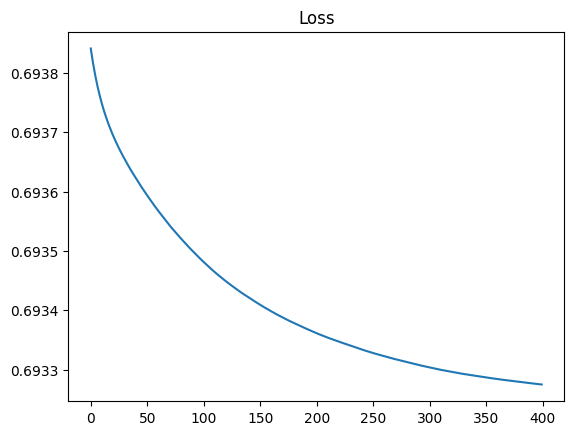

In [49]:
plt.plot(losses)
plt.title("Loss")
plt.show()

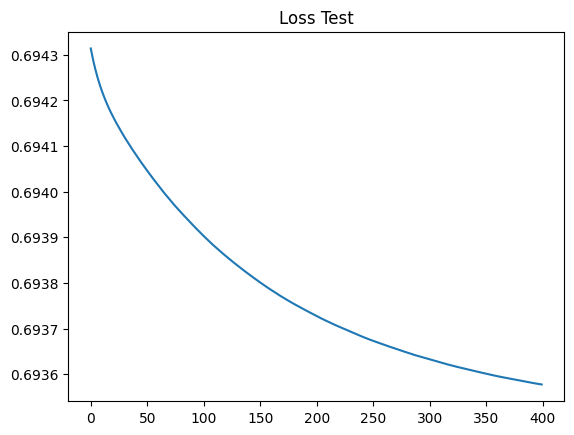

In [51]:
plt.plot(losses_test)
plt.title("Loss Test")
plt.show()

In [26]:
for name, param in model.named_parameters():
        print(name,param)

linear1.weight Parameter containing:
tensor([[ 0.0938,  0.0250, -0.1376, -0.0072,  0.0952,  0.3684],
        [ 0.0712,  0.1758,  0.2586, -0.1760, -0.2386,  0.2628],
        [-0.0068,  0.0648, -0.3263,  0.0690, -0.1155, -0.1262],
        [ 0.1192, -0.3427,  0.0982,  0.2763, -0.2506,  0.3246],
        [ 0.3475,  0.1960,  0.2421,  0.0483, -0.2673, -0.1604],
        [ 0.3851, -0.0405, -0.1190,  0.1284, -0.0083, -0.3616],
        [-0.0527, -0.2308,  0.0565,  0.0011,  0.3568,  0.0347],
        [-0.1766, -0.2426,  0.2052, -0.2495,  0.2796, -0.0103],
        [ 0.3422, -0.2537, -0.2134, -0.3337,  0.0006, -0.0120],
        [-0.3119, -0.3257,  0.1899,  0.0984,  0.3735, -0.2203],
        [-0.3935, -0.1106, -0.1878,  0.2365,  0.1022, -0.3381],
        [-0.0159, -0.2185, -0.0338, -0.0406,  0.3663,  0.1249]],
       requires_grad=True)
linear1.bias Parameter containing:
tensor([-0.0640,  0.1432,  0.3570,  0.2339, -0.0928, -0.0580, -0.2148, -0.3430,
        -0.2090,  0.1156, -0.0236,  0.3071], require